In [19]:
import joblib
import pandas as pd
import numpy as np
import os
import xgboost as xgb
import matplotlib.pyplot as plt
%matplotlib inline


# 数据

In [12]:
f_score = joblib.load('./f_score')
cols = f_score[f_score!=0].index

len(cols)

x_train = joblib.load('x_trian.lz4')
y_train = joblib.load('y_train.lz4')

x_train_fs = x_train[cols]

# 模型

In [ ]:
for i in range(100,len(cols)+100,100):
    print(i)
    x = x_train_fs.iloc[:,:i].values
    y = y_train
    params={
        'booster':'gbtree',
        'objective': 'binary:logistic',
        'early_stopping_rounds':10,
        'scale_pos_weight': float(len(y)-np.sum(y))/float(np.sum(y)),  # 负例样本除以正例样本
        'eval_metric': 'auc',
        'gamma':0.1,
        'max_depth':6,
        'lambda':100,
        'subsample':0.9,
        'colsample_bytree':0.9,
        'eta': 0.04,
        'seed':2018,
        'nthread':18
            }
    dtrain = xgb.DMatrix(x,y)
    eval_hist = xgb.cv(params,dtrain,num_boost_round=400,nfold=3,verbose_eval =40)
    joblib.dump(eval_hist,'./rough_eval/eval_hist_{}'.format(i))

100
[0]	train-auc:0.821262+0.00370416	test-auc:0.764056+0.00343687
[40]	train-auc:0.903172+0.000624216	test-auc:0.822193+0.00219195
[80]	train-auc:0.925247+0.0011678	test-auc:0.833951+0.0022198
[120]	train-auc:0.941098+0.00117599	test-auc:0.840817+0.00169701
[160]	train-auc:0.953884+0.000963878	test-auc:0.844253+0.00143741
[200]	train-auc:0.964279+0.00115392	test-auc:0.845932+0.00107405
[240]	train-auc:0.972673+0.000555468	test-auc:0.847201+0.000892839
[280]	train-auc:0.979327+0.000274601	test-auc:0.847842+0.000774334
[320]	train-auc:0.984703+0.00042458	test-auc:0.848151+0.000372309
[360]	train-auc:0.988631+0.000440812	test-auc:0.848372+0.00014462
[399]	train-auc:0.991671+0.000345792	test-auc:0.848481+0.000427268
200
[0]	train-auc:0.820398+0.00463011	test-auc:0.757466+0.00102713
[40]	train-auc:0.910355+0.000799389	test-auc:0.820591+0.00308609
[80]	train-auc:0.935613+0.00111211	test-auc:0.833189+0.00262017
[120]	train-auc:0.952979+0.0011327	test-auc:0.83998+0.00276714
[160]	train-auc:0.

## 展示test_auc

In [9]:
file_names = os.listdir('./rough_eval/')
file_names = sorted(file_names,key=lambda x:int(x.split('_')[-1]))


In [17]:
auc_df = pd.DataFrame()
num_list = []
auc_mean_list = []
auc_std_list = []
for file in file_names:
    num_list.append(int(file.split('_')[-1]))
    tmp = joblib.load('./rough_eval/{}'.format(file)).iloc[-1,[0,1]]
    auc_mean_list.append(tmp['test-auc-mean'])
    auc_std_list.append(tmp['test-auc-std'])
auc_df['num'] = num_list
auc_df['test-auc-mean'] = auc_mean_list
auc_df['test-auc-std'] = auc_std_list

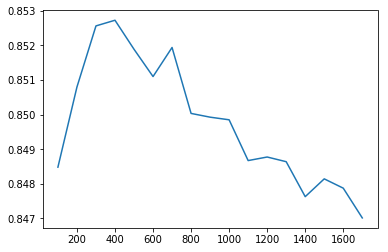

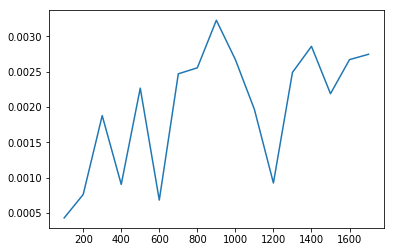

In [22]:
plt.figure()
plt.plot(auc_df['num'],auc_df['test-auc-mean'])
plt.figure()
plt.plot(auc_df['num'],auc_df['test-auc-std'])